<a href="https://www.kaggle.com/code/aayushsin7a/algerian-forest-fires-eda-fe-regression?scriptVersionId=158296565" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import the required library
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

print("All the libraries loaded successfully")

/kaggle/input/algerian-forest-fires-dataset/Algerian_forest_fires_dataset.csv
All the libraries loaded successfully


> The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region.

- The period from June 2012 to September 2012.
- The dataset includes 11 attributes and 1 output attribute (class)
- The 244 instances have been classified into 'fire' (138 classes) and 'not fire' (106 classes) classes.

> Attribute Information:

- 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- 2. Weather data observations 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 
- 3. RH : Relative Humidity in %: 21 to 90 
- 4. Ws :Wind speed in km/h: 6 to 29 
- 5. Rain: total day in mm: 0 to 16.8 FWI Components 
- 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
- 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
- 8. Drought Code (DC) index from the FWI system: 7 to 220.4 
- 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
- 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 
- 11. Fire Weather Index (FWI) Index: 0 to 31.1 
- 12. Classes: two classes, namely Fire and not Fire

In [2]:
# read the dataset 
df = pd.read_csv("/kaggle/input/algerian-forest-fires-dataset/Algerian_forest_fires_dataset.csv")

In [3]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [4]:
df.shape

(247, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# Data Cleaning 

In [6]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.drop([122,123],axis=0,inplace=True)

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.7+ KB


In [12]:
df['Region'] = df['Region'].astype('int')

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
df=df.drop(122).reset_index(drop=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
# Remove spaces from column names
df.columns = df.columns.str.strip()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [22]:
# Change data types (required cols as integers, Month,year,temperature,rh,ws)
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype('int')

In [23]:
# Changing the other columns to float dataframe 

In [24]:
[features for features in df.columns if df[features].dtypes=='O']

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [25]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [26]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [27]:
for i in objects:
    if i !='Classes':
        df[i]=df[i].astype('float')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [29]:
# Cleaned dataset 
#df.to_csv("Algerian_Forrest_Fires_cleaned_dataset.csv",index=False)

# Exploratory Data Analysis

> Diagnose the cleaned dataframe 

In [30]:
def diagnose_dataframe(df, verbose=True):
  """
  Performs various initial inspections on a pandas dataframe and provides details.

  Args:
    df: The pandas dataframe to diagnose.
    verbose: Whether to print details for each inspection.

  Returns:
    A dictionary containing the results of the inspections.
  """

  results = {}

  # Basic information
  results["shape"] = df.shape
  results["columns"] = list(df.columns)
  results["dtypes"] = df.dtypes.to_dict()
  results["null_counts"] = df.isnull().sum().to_dict()

  # Descriptive statistics
  results["describe"] = df.describe(include='all')

  # Unique values and counts
  for col in df.columns:
    results[f"unique_values_{col}"] = df[col].unique()
    results[f"value_counts_{col}"] = df[col].value_counts().to_dict()

  # Missing value analysis
  missing_values_pct = (df.isnull().sum() / df.shape[0]) * 100
  results["missing_values_pct"] = missing_values_pct.to_dict()
  missing_values_threshold = 0.5  # Set a threshold for high missing value percentage
  high_missing_values = missing_values_pct[missing_values_pct > missing_values_threshold]
  results["high_missing_values"] = list(high_missing_values.index)

  # Duplicate rows
  duplicate_rows = df[df.duplicated()]
  results["duplicate_rows_count"] = len(duplicate_rows)

  # Outlier analysis
  # ... (implement your own outlier analysis strategy)

  if verbose:
    for key, value in results.items():
      print(f"\n{key}:\n{value}")

  return results

In [31]:
#diagnose_dataframe(df)

In [32]:
df1 = df.drop(columns=['day','month','year'],axis=1)

In [33]:
df1.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
## Encode categories in classes
df1['Classes']= np.where(df1['Classes'].str.contains("not fire"),0,1)

In [35]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

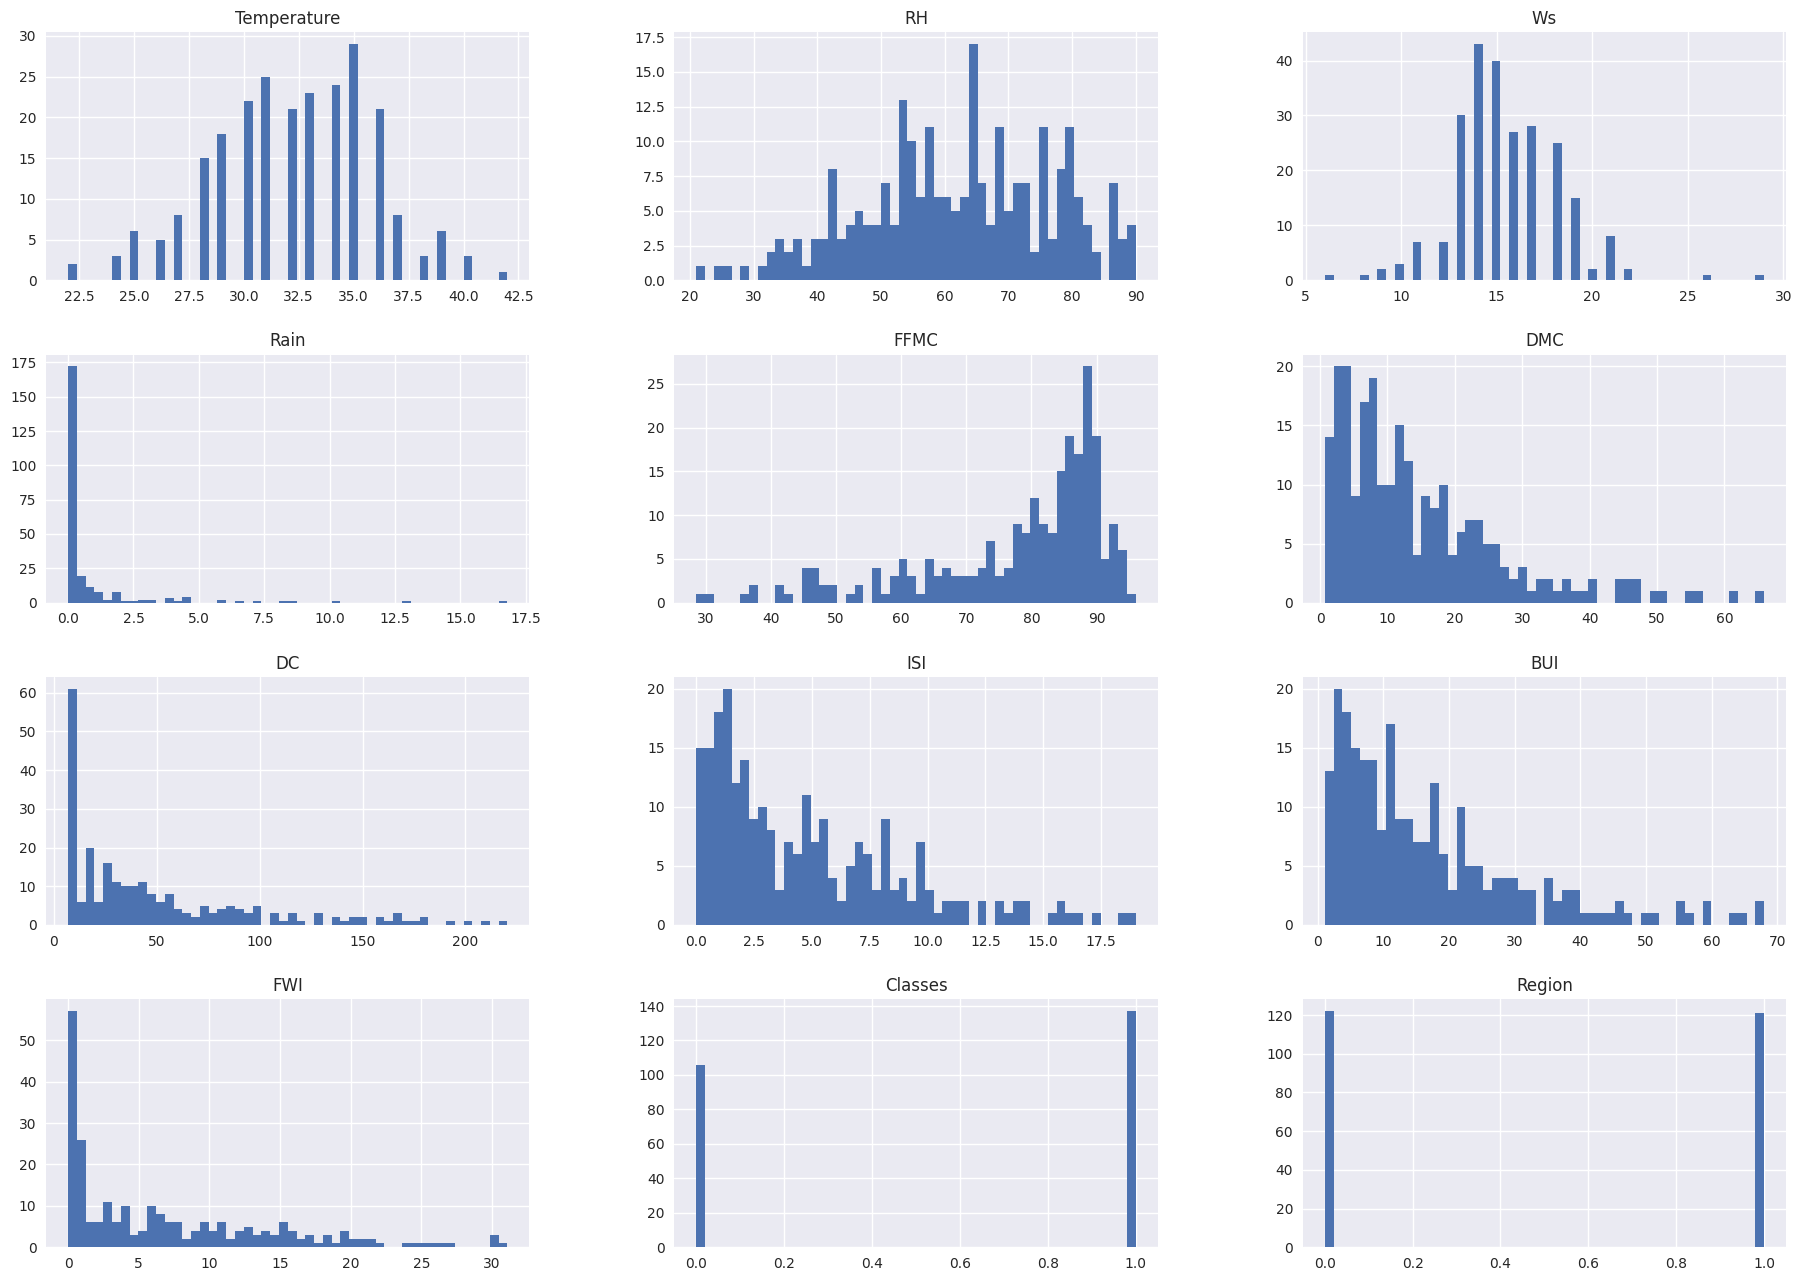

In [36]:
## Plot density plot for all features
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [37]:
# Percentage pie charts 
percentage = df1['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Classes')

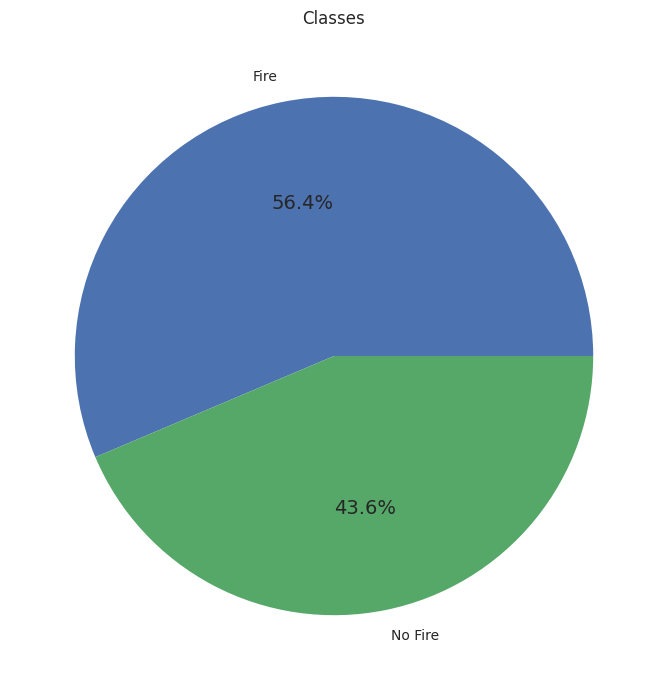

In [38]:
# plot pie charts 
class_lables = ["Fire","No Fire"]
plt.figure(figsize=(12,8))
plt.pie(percentage,labels=class_lables,autopct='%1.1f%%')
plt.title("Classes")

In [39]:
# Correlations 

In [40]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


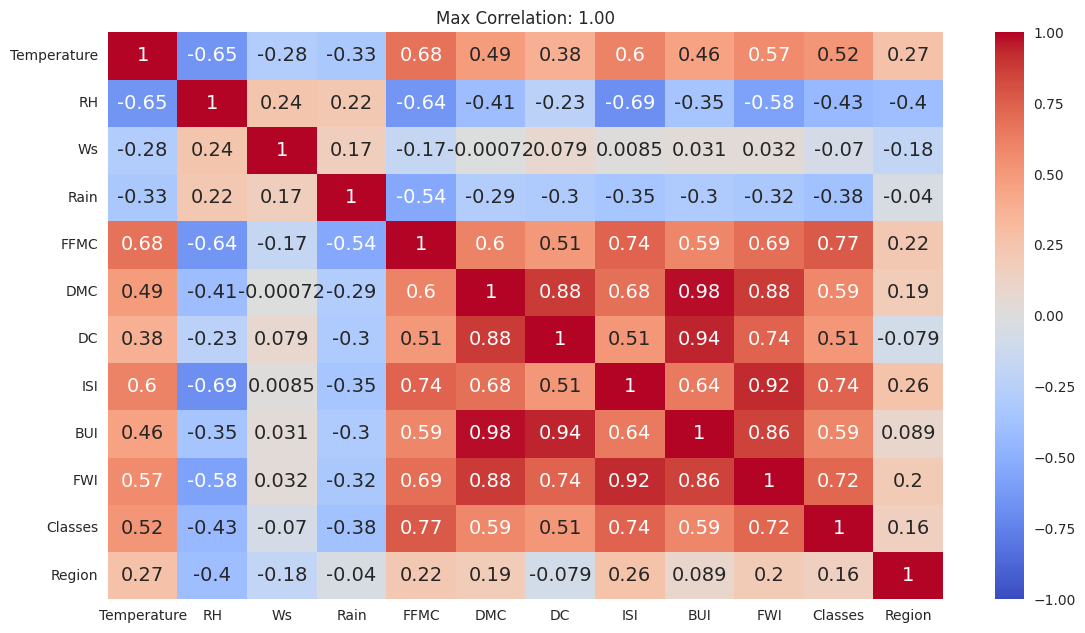

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
corr_matrix = df1.corr()

# Find the maximum correlation value
max_corr = corr_matrix.stack().max()

# Create a heatmap with only the maximum correlation value
plt.figure(figsize=(12, 7))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, vmax=max_corr, vmin=-max_corr, cmap='coolwarm')
plt.title(f'Max Correlation: {max_corr:.2f}')
plt.show()


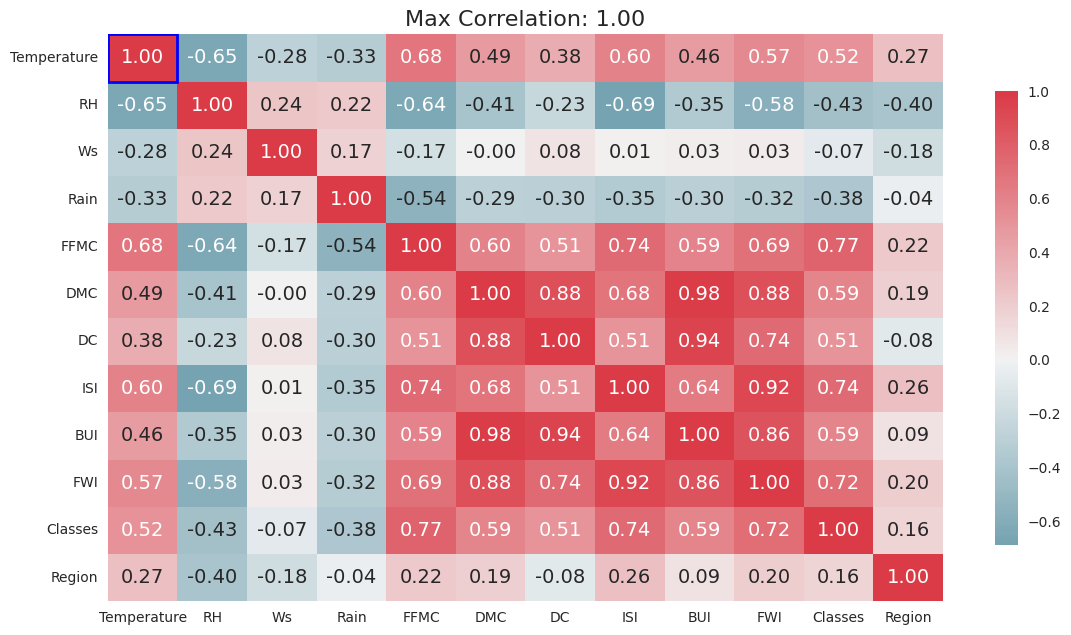

In [42]:
corr_matrix = df1.corr()

# Find the maximum correlation value and its indices
max_corr = corr_matrix.stack().max()
max_corr_indices = corr_matrix.stack().idxmax()

# Create a custom colormap for the heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Converting column names (strings) to numerical indices for the matplotlib coordinates

# Adjusting indices for matplotlib which uses zero-based indexing
# Converting column names to numerical indices
adjusted_indices = (corr_matrix.columns.get_loc(max_corr_indices[1]), corr_matrix.index.get_loc(max_corr_indices[0]))
plt.figure(figsize=(12, 7))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, cbar_kws={"shrink": 0.8})
plt.title(f'Max Correlation: {max_corr:.2f}', fontsize=16)

# Highlight the cell with the highest correlation value
highlighted_cell = plt.Rectangle(adjusted_indices, 1, 1, fill=False, edgecolor='blue', lw=2)
ax.add_patch(highlighted_cell)

plt.show()


<Axes: >

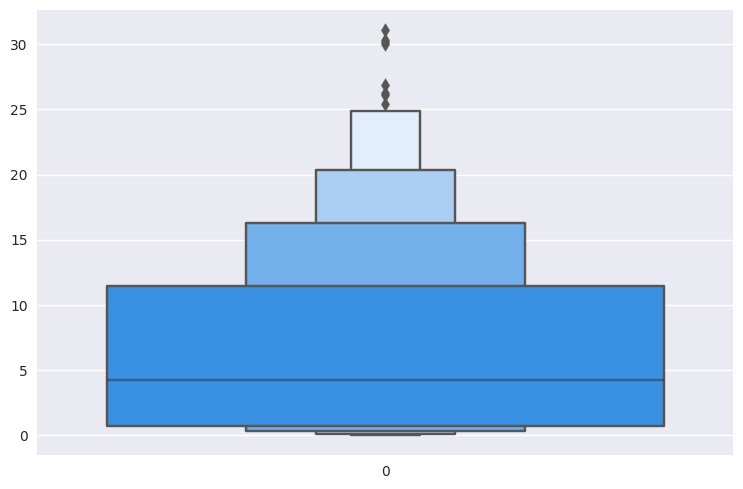

In [43]:
## Box Plot
sns.boxenplot(df1['FWI'],color='dodgerblue')

In [44]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

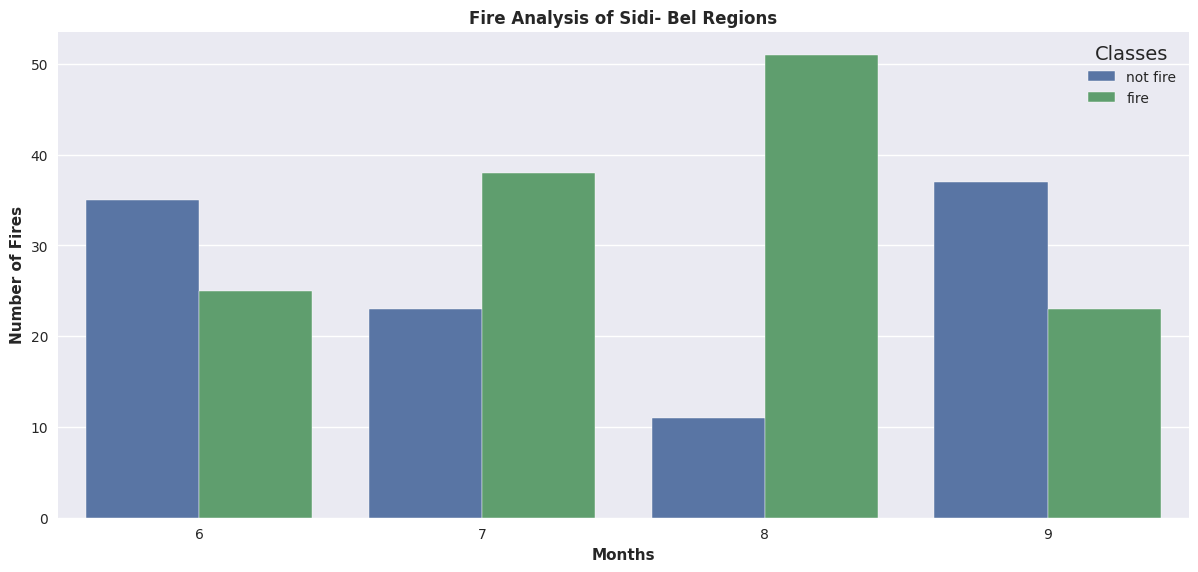

In [45]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

> Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

- Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

- Less Fires was in September

# Model Training 

In [46]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [47]:
# drop month day and year
#df.drop(columns=['day','month','year'],inplace=True)

In [48]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

> Encoding

In [49]:
#df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [50]:
# Independent & Dependent features 
X = df1.drop('FWI',axis=1)
y = df1['FWI']

In [51]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [52]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [53]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [54]:
print(X_train.shape),print(X_test.shape)
print(y_train.shape),print(y_test.shape)


(182, 11)
(61, 11)
(182,)
(61,)


(None, None)

## Feature Selection based on Correlation


In [55]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


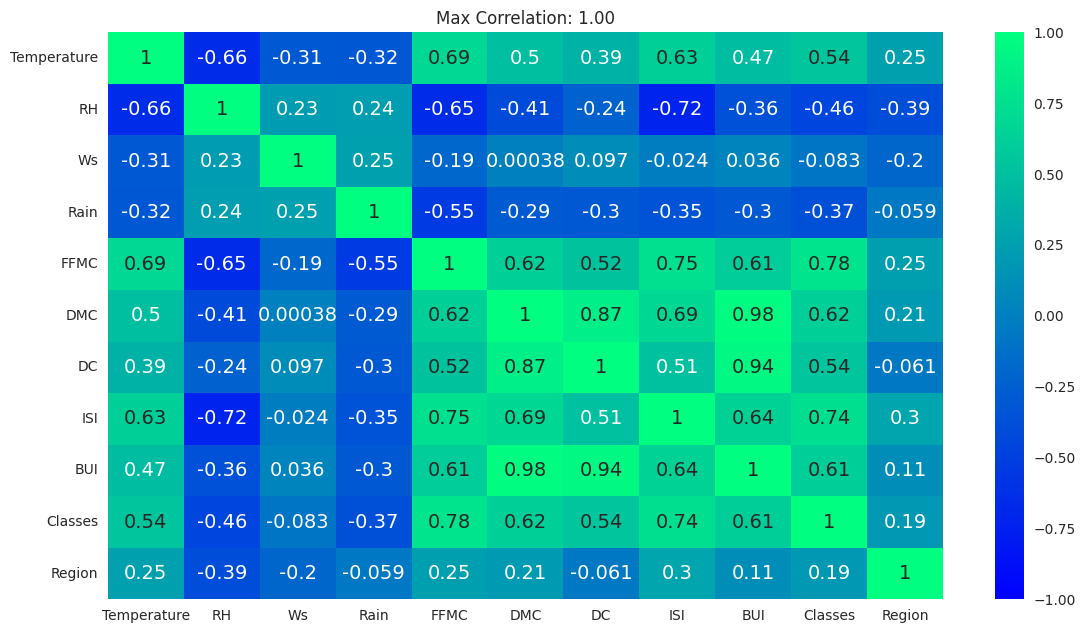

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
corr_matrix = X_train.corr()

# Find the maximum correlation value
max_corr = corr_matrix.stack().max()

# Create a heatmap with only the maximum correlation value
plt.figure(figsize=(12, 7))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, vmax=max_corr, vmin=-max_corr, cmap='winter')
plt.title(f'Max Correlation: {max_corr:.2f}')
plt.show()

In [57]:
# Check for Multicollinearity 

In [58]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [59]:
corr_features = correlation(X_train,0.85)

In [60]:
corr_features

{'BUI', 'DC'}

In [61]:
## drop features when correlation is > 0.85 
X_train.drop(corr_features,axis=1,inplace=True)

In [62]:
X_test.drop(corr_features,axis=1,inplace=True)

In [63]:
(X_train.shape), (X_test.shape)

((182, 9), (61, 9))

# Features Scaling and Standardization 


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [65]:
X_train

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [66]:
X_test

array([[-3.73215184e-01,  1.86526055e-01, -7.56034558e-02,
        -3.93465417e-01,  5.75516485e-01, -2.71484039e-02,
         3.33219559e-01,  8.05387266e-01, -1.01653005e+00],
       [ 2.18112770e-01, -5.15825141e-01, -6.90511563e-01,
        -3.93465417e-01,  6.80353750e-01, -3.98035193e-01,
         5.29474389e-01,  8.05387266e-01, -1.01653005e+00],
       [-1.26020712e+00, -2.34884662e-01,  8.46758705e-01,
         1.07328622e+00, -1.03198825e+00, -9.75928561e-01,
        -9.28418633e-01, -1.24163870e+00,  9.83738754e-01],
       [ 5.13776747e-01, -2.34884662e-01, -6.90511563e-01,
        -2.60124359e-01,  7.22976113e-02,  3.60988933e-01,
        -6.76090995e-01, -1.24163870e+00,  9.83738754e-01],
       [-6.68879162e-01,  2.56761175e-01, -3.83057509e-01,
        -3.93465417e-01,  4.84657521e-01,  1.28106531e-01,
        -3.21729229e-03,  8.05387266e-01,  9.83738754e-01],
       [ 1.99209663e+00,  1.86526055e-01, -1.92032778e+00,
         4.06580931e-01, -3.26083997e-01, -2.427802